In [67]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.model_selection import cross_val_score




import pickle



In [54]:
### Loading dataset
sales_df = pd.read_csv("C:/Users/swati/Downloads/DSData-master/DSData-master/Advertising.csv")

In [12]:
### Showing top 5 rows of dataset
sales_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
#### Showing random 10 rows to take more idea about data set:-
sales_df.sample(10)

,Unnamed: 0,TV,radio,newspaper,sales
30,31,292.9,28.3,43.2,21.4
186,187,139.5,2.1,26.6,10.3
103,104,187.9,17.2,17.9,14.7
168,169,215.4,23.6,57.6,17.1
37,38,74.7,49.4,45.7,14.7
88,89,88.3,25.5,73.4,12.9
153,154,171.3,39.7,37.7,19.0
79,80,116.0,7.7,23.1,11.0
189,190,18.7,12.1,23.4,6.7
124,125,229.5,32.3,74.2,19.7


As we can see Unnamed: 0 column is nothing but an index or serial number,and it can not help  to  predict sales,so dropping this 
column.    

In [14]:
sales_df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [15]:
## Size of dataframe:
sales_df.shape

(200, 4)

In [17]:
##  Checking Data Type and column name information :
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


As we can see all column data types are float and int type and there is not any null value present.

In [16]:
#######Checking null values using isnull() method:-
sales_df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

As we can see there is not any null value.

In [36]:

sales_df.describe(include='all')


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


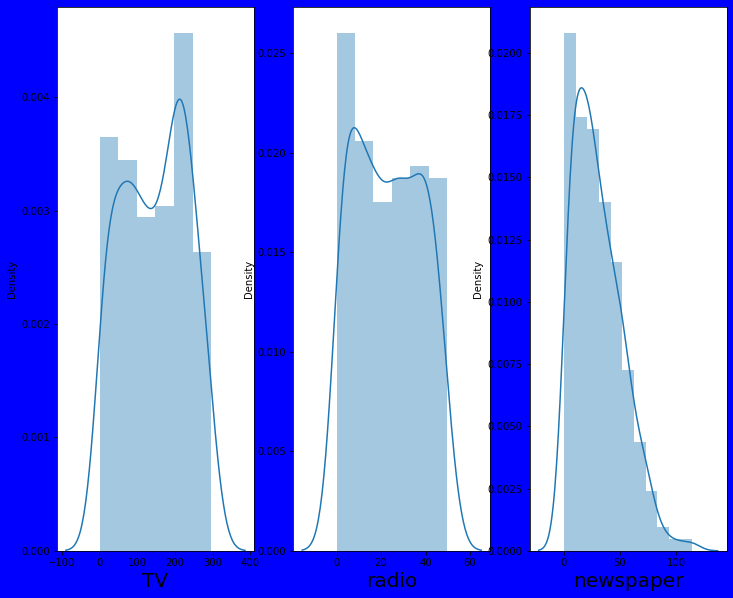

In [23]:
#### Checking data distribution in columns:
plt.figure(figsize=(12,10),facecolor='b')
plotnumber =1
for column in sales_df :
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(sales_df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()    

<AxesSubplot:xlabel='TV', ylabel='sales'>

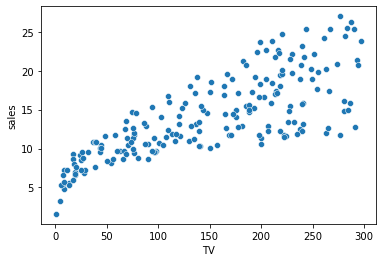

In [24]:
### Checking  Tv feature relationship with label sales:
sns.scatterplot(x=sales_df['TV'],y=sales_df['sales'],data =sales_df)


As we can see there is a positive relationship between TV and sales,if we spend more on TV advertising ,sales increases.

<AxesSubplot:xlabel='radio', ylabel='sales'>

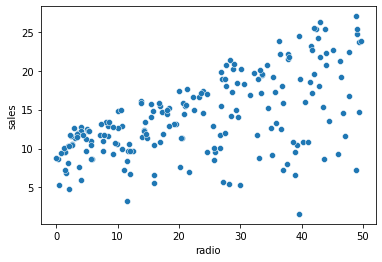

In [25]:
### Checking  radio feature relationship with label sales:
sns.scatterplot(x=sales_df['radio'],y=sales_df['sales'],data =sales_df)


As we can see there is a positive relationship between radio and sales,if we spend more on radio advertising ,sales increases.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

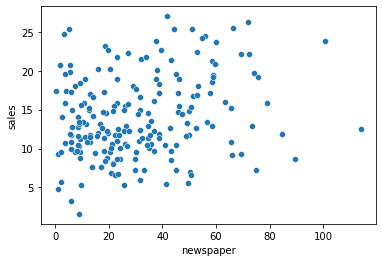

In [26]:
### Checking  newspaper feature relationship with label sales:
sns.scatterplot(x=sales_df['newspaper'],y=sales_df['sales'],data =sales_df)


As we can see there is  not any  sprcific relationship between newspaper and sales.

<AxesSubplot:>

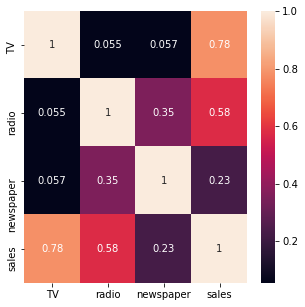

In [32]:
###Checking Correlation:
plt.figure(figsize=(5,5))
sns.heatmap(sales_df.corr(),annot =True)
    

As from above heatmap,we can see TV and radio correlation with sales is more than 50% where as newspaper has very weak 
relationship  with sales.

In [37]:
## Checking skewness:-
sales_df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [ ]:
As we can see data ranges between +/- 1,so will not remove skewness.

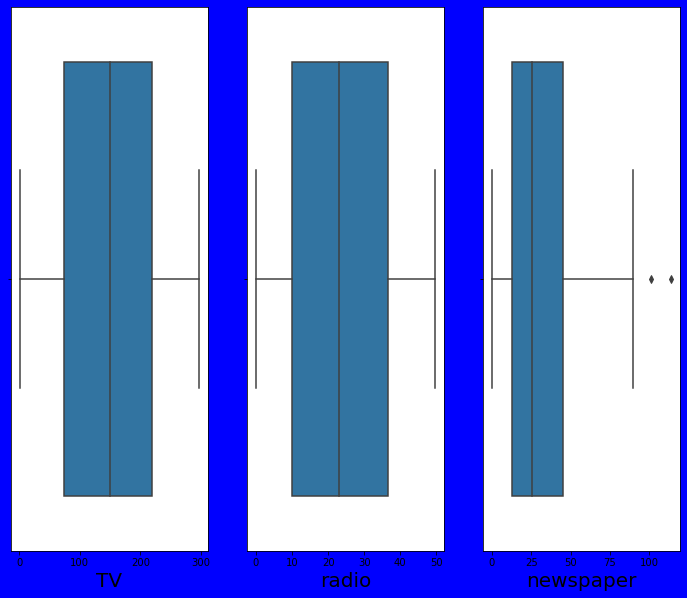

In [40]:
###Checking outliers:-
plt.figure(figsize=(12,10),facecolor='b')
plotnumber =1
for column in sales_df :
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(sales_df[column],orient = 'h')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()    


In [ ]:
from above graph we can see there is not any outliers in TV and radio data,and 2 data points are appeared close to viscus and as outliers 
since we have very less data,so will not remove it.

In [46]:
### Splitting Features and Label:-
x = sales_df.drop('sales',axis=1)
y = sales_df['sales']

In [47]:
## Checking shape of X
x.shape

(200, 4)

In [48]:
## Checking shape of y:
y.shape

(200,)

In [49]:
### Since data is not scaled between 0 and 1 so scaling data using Standard Scaler:-
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-1.72341210e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [-1.70609137e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [-1.67144992e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [-1.65412920e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [-1.63680847e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [-1.61948775e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [-1.60216702e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [-1.56752558e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [-1.55020485e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [-1.53288413e+00,  7.90028350e-01,  4.96973404e-02,
      

In [52]:
######## Finding best random state:-
maxAcc = 0
maxrs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    acc = r2_score(y_test,pred_test)
    
    if acc >maxAcc:
        maxAcc=acc
        maxrs=i
print("Best Accuracy is :",maxAcc,"at random state",maxrs)        

Best Accuracy is : 0.9526488497301869 at random state 151


# Linear Regression

In [56]:
### Creating train test split:-
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.20,random_state =151)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc



0.9526488497301869

# Ensemble Technique

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
acc = r2_score(y_test,pred_test)

acc



0.9753425487896157

# KNeighborsRegressor

In [61]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test = knr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc


0.895553769834198

# DecisionTreeRegressor

In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test = dtr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc



0.9413439137323772

# Ridge Regression

In [65]:
rd = Ridge()
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

acc = r2_score(y_test,predict_rd)
acc

0.9530650036445957

# Cross Validation:-

In [73]:
cvs= cross_val_score(lr,x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.8842777844741688


In [74]:
cvs= cross_val_score(rf,x_scaler,y,cv=5)
print("Cross Validation of RandomForest Regression model ",cvs.mean())


Cross Validation of RandomForest Regression model  0.9715664639099202


In [75]:
cvs= cross_val_score(knr,x_scaler,y,cv=5)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.8808136029012269


In [76]:
cvs= cross_val_score(dtr,x_scaler,y,cv=5)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())


Cross Validation of DecisionTree Regression model  0.9495202087818597


In [77]:
cvs= cross_val_score(rd,x_scaler,y,cv=5)
print("Cross Validation of Ridge Regression model ",cvs.mean())


Cross Validation of Ridge Regression model  0.8843118500531693


So we can see Cross validation score is higher than other models and models are not overfitting.

# Hyper Parameter Tuning

In [83]:
params = {
          'criterion':['mse','mae'],
          'max_features':["auto","sqrt","log2"],
          'max_depth' : range(2,15),
          'min_samples_leaf':range(2,15)
    
         }
rf = RandomForestRegressor()
grid_search = GridSearchCV(rd,params)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)


{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2}


In [101]:
### Providing best features:-
rf = RandomForestRegressor(criterion = 'mae',max_depth = 10,max_features = 'auto',min_samples_leaf=3)
rf.fit(x_train,y_train)
predict_rd = rd.predict(x_test)
score = r2_score(y_test,predict_rd)
score



0.9710451259392587

In [ ]:
Here,I have provided model with best parameters.but it gives score  little less than without hyperparameters.So playing with some
parameters,it has given above score.

# Model Saving

In [105]:
filename = 'sales_prediction.pickle'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [107]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(rf.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,8.4,9.2830
1,13.2,13.3375
2,11.4,11.6480
3,10.1,10.6590
4,8.0,7.5580
5,21.2,21.6265
6,24.2,24.4915
7,6.9,8.2510
8,9.5,8.4245
9,4.8,6.1630
